In [93]:
#reference link: https://github.com/mediasittich/Predicting-Stock-Prices-with-Linear-Regression/blob/master/Predicting%20Stock%20Prices%20with%20Linear%20Regression.ipynb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.metrics import mean_absolute_error as mae


df = pd.read_csv('TSLA_2018_2021.csv')
# Import matplotlib package for date plots
import matplotlib.dates as mdates

In [94]:

# Import package for splitting data set
from sklearn.model_selection import train_test_split
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.2)

In [101]:
train

,Date,Open,High,Low,Close,Adj Close,Volume
327,2019-04-23,52.029999,53.119999,51.150002,52.779999,52.779999,54719500
301,2019-03-15,56.702000,56.743999,54.880001,55.085999,55.085999,73927500
499,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
849,2021-05-18,568.000000,596.250000,563.380005,577.869995,577.869995,36830600
18,2018-01-29,67.970001,70.169998,67.655998,69.905998,69.905998,23735500
...,...,...,...,...,...,...,...
25,2018-02-07,67.797997,69.199997,67.132004,69.000000,69.000000,34846000
371,2019-06-25,44.877998,45.068001,43.897999,43.952000,43.952000,30910500
757,2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
8,2018-01-12,67.725998,68.082001,66.734001,67.244003,67.244003,24125500


In [102]:
test

,Date,Open,High,Low,Close,Adj Close,Volume
805,2021-03-16,703.349976,707.919983,671.000000,676.880005,676.880005,32195700
389,2019-07-22,51.750000,52.430000,50.838001,51.136002,51.136002,34212000
407,2019-08-15,44.172001,44.312000,42.310001,43.127998,43.127998,40798000
302,2019-03-18,55.200001,55.610001,53.459999,53.897999,53.897999,51405000
349,2019-05-23,38.868000,39.894001,37.243999,39.098000,39.098000,132735500
...,...,...,...,...,...,...,...
97,2018-05-22,57.551998,57.599998,54.683998,55.001999,55.001999,44729000
31,2018-02-15,64.900002,66.823997,64.480003,66.814003,66.814003,29564500
460,2019-10-30,62.599998,63.757999,61.993999,63.001999,63.001999,48209000
173,2018-09-10,54.652000,57.206001,54.200001,57.099998,57.099998,71417500


In [95]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [96]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [97]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [98]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.7566263448620545
Intercept:  -118.62415328531335


<ipython-input-98-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


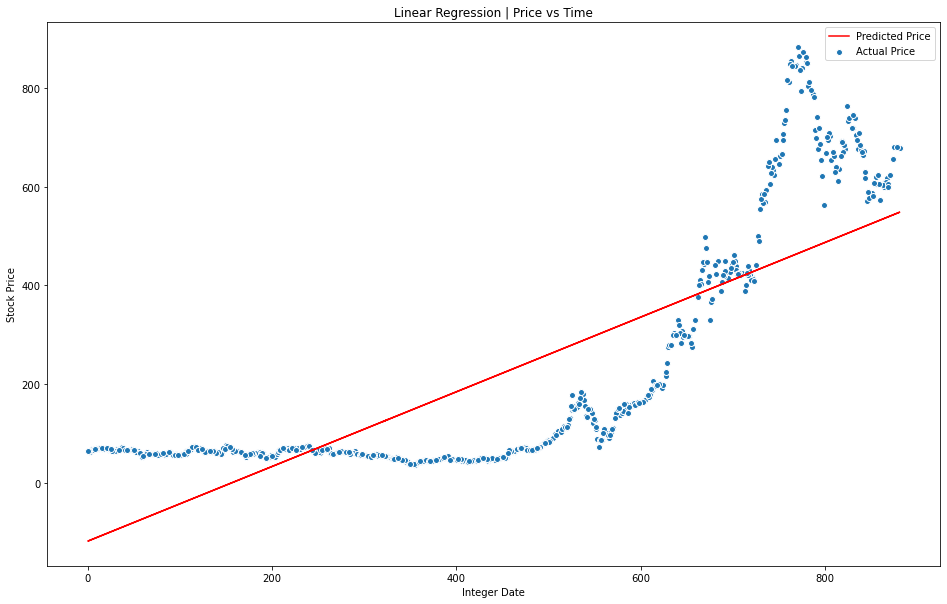

In [100]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [81]:

from sklearn.metrics import mean_absolute_error as mae

#calculate MAE #mean absolute error
# plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
predict = model.predict(X_train)
actual =y_train

mae(actual,predict )


116.26792695815246

In [82]:
from sklearn.metrics import r2_score
r2_score(actual,predict)

0.6649136668508846

In [56]:
# # Create test arrays
# X_test = np.array(test.index).reshape(-1, 1)
# y_test = test['Close']


In [57]:
# print(X_test)
print(y_test)

# # Generate array with predicted values
# y_pred = model.predict(X_test)
# y_pred 



195     51.375999
476     70.966003
874    656.570007
696    425.299988
654    290.541992
          ...    
721    417.130005
307     52.084000
124     68.589996
779    852.229980
70      60.068001
Name: Close, Length: 177, dtype: float64


In [50]:
from sklearn.metrics import r2_score
r2_score(X_test, y_pred)

# # Get number of rows in data set for random sample
# df.shape

0.17202883813690284

In [51]:
from sklearn.metrics import mean_absolute_error as mae

#calculate MAE #mean absolute error

mae(X_test, y_pred )

222.32052003546468